<a href="https://colab.research.google.com/github/mongikourchid/Prediction-of-Product-Sales/blob/main/Project_1_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Author:Kourchid mongi





# ***Project 1 - Parts 2(Core)***

**Imports**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive='/content/drive/MyDrive'

# **Loading Data**

Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Week 2/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Clean Data

1) How many rows and columns?

In [5]:
df.shape

(8523, 12)

 - There are 8523 rows and 12 columns

2) What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

* the Item_Outlet_Sales  column is showing as an object type column and should be either a float64 or an int64 type column
*the Outlet_Size column contains NAN value
*All other data types are as they should be.

4) Identifiez les valeurs manquantes

In [6]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Check the datatype
type(null_sums)

pandas.core.series.Series

In [ ]:
# Get the % of null values
null_percent = null_sums/len(df) * 100
null_percent



Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
# Dropping Null values from Item_Weight
df = df.dropna(subset=["Item_Weight"])

In [9]:
# Confirming no more null Item_Weight
df['Item_Weight'].isna().sum()

0

In [10]:
# Dropping Null values from Item_Weight
df = df.dropna(subset=["Outlet_Size"])

In [ ]:
# Confirming no more null Item_Weight
df['Outlet_Size'].isna().sum()

In [11]:
# Saving list of column names for object cols
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
# Checking which categorical columns had missing values.
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).**texte en gras**

In [14]:
# Obtention des statistiques récapitulatives pour les colonnes numériques
summary_stats = df.describe()
print(summary_stats)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  4650.000000      4650.000000  4650.000000                4650.000000   
mean     12.898675         0.060700   141.716328                1999.190538   
std       4.670973         0.044607    62.420534                   7.388800   
min       4.555000         0.000000    31.490000                1987.000000   
25%       8.770000         0.025968    94.409400                1997.000000   
50%      12.650000         0.049655   142.979900                1999.000000   
75%      17.000000         0.088736   186.614150                2004.000000   
max      21.350000         0.188323   266.888400                2009.000000   

       Item_Outlet_Sales  
count        4650.000000  
mean         2272.037489  
std          1497.964740  
min            69.243200  
25%          1125.202000  
50%          1939.808300  
75%          3111.616300  
max         10256.649000  


# **Projet 1 - Partie 3 (Core)**

* Complete any statistical analyses that might help you understand, explain, or model with your data

## Exploratory Visuals & Analysis




In [15]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB



* *texte en italique* For each numeric feature, we will plot the distribution and a boxplot.

---



In [16]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Histogrammes pour afficher les distributions des entités numériques dans votre ensemble de données.

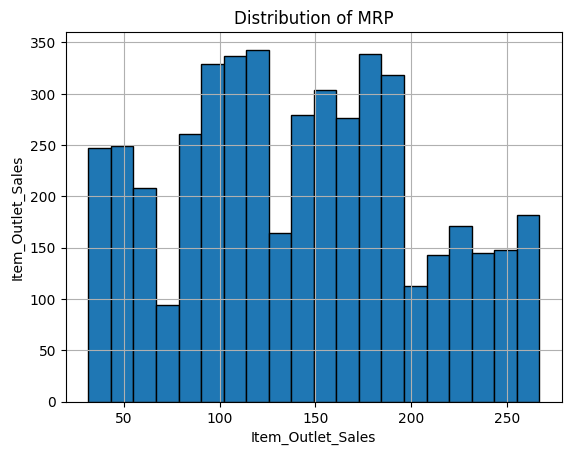

In [17]:
# Create the histogram
ax = df['Item_MRP'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of MRP')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Item_Outlet_Sales');

In [18]:
Ob_cols = df.select_dtypes('object').columns
Ob_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Boxplots for displaying statistical summaries of numerical features

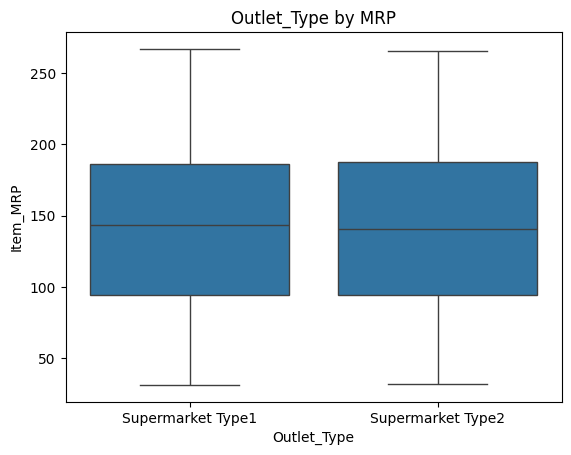

In [19]:
# Create the boxplot
ax = sns.boxplot(x = 'Outlet_Type', y = 'Item_MRP', data = df)
ax.set_title('Outlet_Type by MRP');


Countplots to display the frequency of each categorical feature class

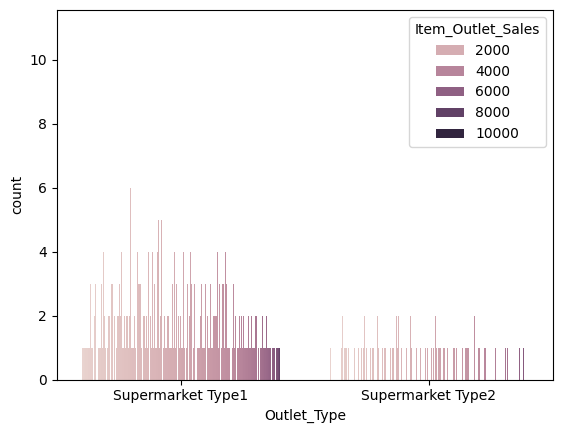

In [20]:
# Make a barplot of TYPE vs MRP
ax = sns.countplot(data=df, x='Outlet_Type',hue='Item_Outlet_Sales')


Heatmap to view the correlation between features

In [21]:
# Find correlations
mat_corr=df.corr(numeric_only=True)
mat_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.010229,0.033330,-0.010596,0.010972
Item_Visibility,-0.010229,1.000000,-0.007292,0.009324,-0.009644
Item_MRP,0.033330,-0.007292,1.000000,0.004105,0.679594
Outlet_Establishment_Year,-0.010596,0.009324,0.004105,1.000000,-0.040869
Item_Outlet_Sales,0.010972,-0.009644,0.679594,-0.040869,1.000000


<Axes: >

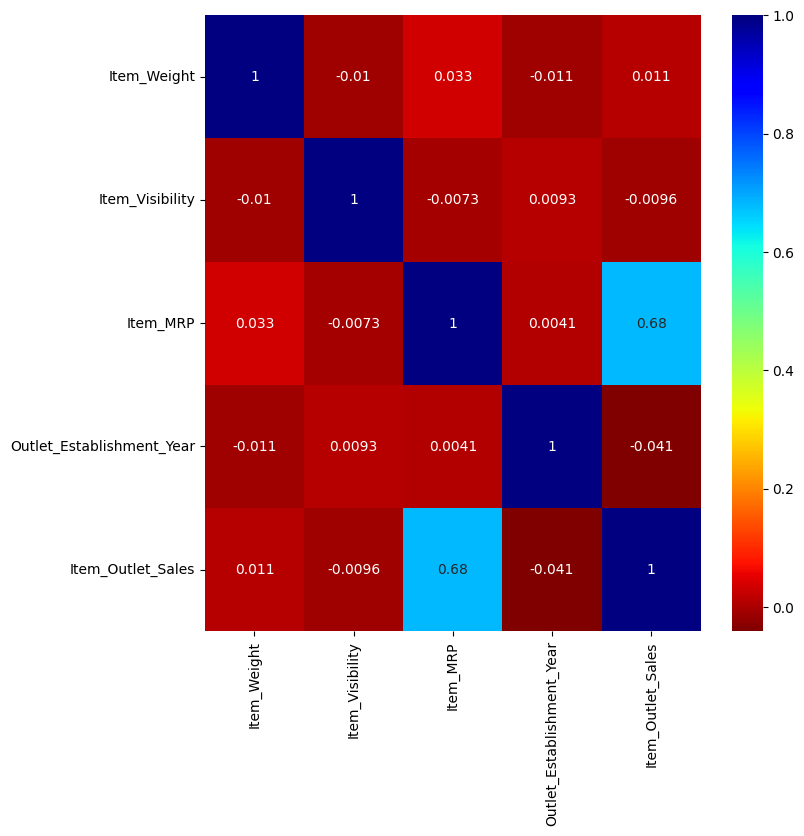

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(mat_corr,annot=True,cmap = 'jet_r')

# Project 1 - Part 4 (Core)

## Inspecting Each Featur

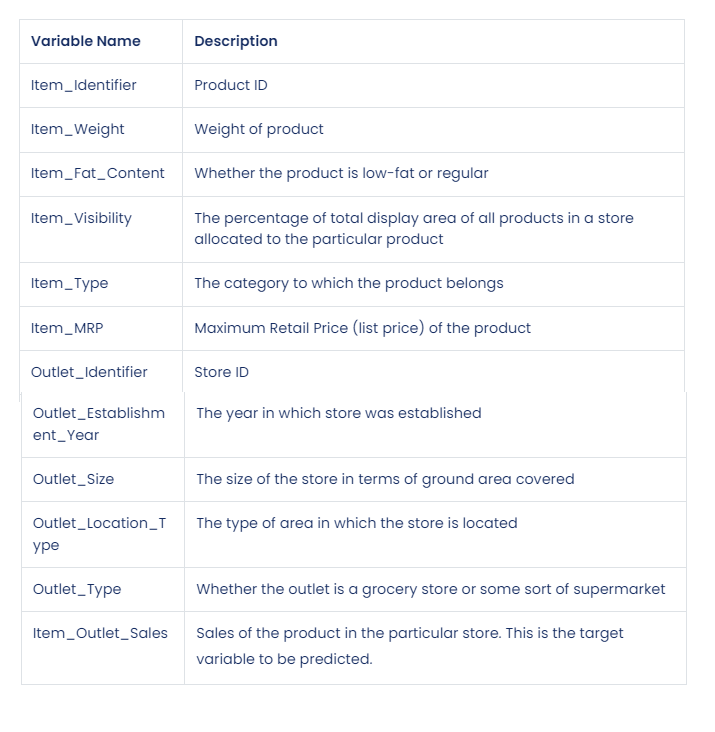

Create a univariate visualization showing the distribution of values/categories

In [22]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

In [23]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

NameError: name 'explore_numeric' is not defined

# Project 1 - Part 5 (Core):

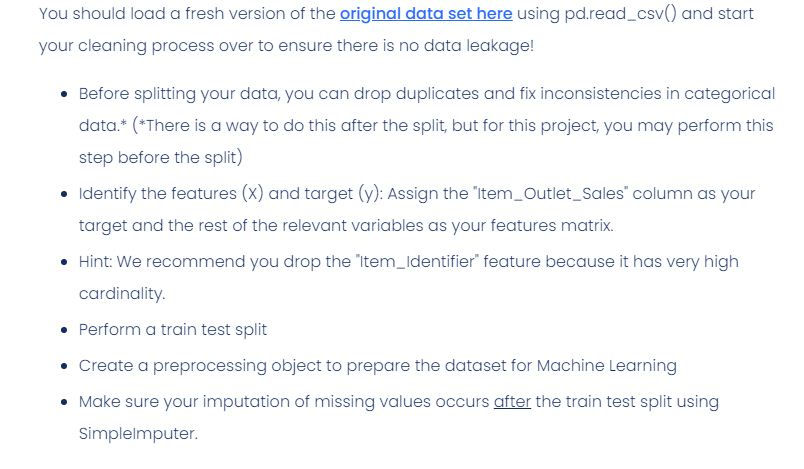

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [29]:
# Check for duplicated values
df.duplicated().sum()

0

In [27]:
# Check for null values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [31]:
# Make X and y
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1260,FDX02,16.000,Low Fat,0.057013,Dairy,225.0404,OUT013,1987,High,Tier 3,Supermarket Type1
1461,FDA20,6.780,Low Fat,0.066566,Fruits and Vegetables,185.3240,OUT013,1987,High,Tier 3,Supermarket Type1
3042,FDF22,6.865,Low Fat,0.056820,Snack Foods,212.6218,OUT035,2004,Small,Tier 2,Supermarket Type1
613,FDX46,12.300,Regular,0.000000,Snack Foods,57.3562,OUT013,1987,High,Tier 3,Supermarket Type1
4815,FDD33,12.850,Low Fat,0.108633,Fruits and Vegetables,233.8642,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [33]:
# Check data types (or use X_train.dtypes)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3487 entries, 1260 to 16
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3487 non-null   object 
 1   Item_Weight                3487 non-null   float64
 2   Item_Fat_Content           3487 non-null   object 
 3   Item_Visibility            3487 non-null   float64
 4   Item_Type                  3487 non-null   object 
 5   Item_MRP                   3487 non-null   float64
 6   Outlet_Identifier          3487 non-null   object 
 7   Outlet_Establishment_Year  3487 non-null   int64  
 8   Outlet_Size                3487 non-null   object 
 9   Outlet_Location_Type       3487 non-null   object 
 10  Outlet_Type                3487 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 326.9+ KB


In [34]:
# Check for null values
X_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [35]:
# checking the shape of X_test
X_test.shape

(1163, 11)